# Lab 5, Maria Chernyavskaya, Section AB

## Lab 5 Instructions
1. Getting started (don't turn in, but think)
    A. Pick and download your data
    B. Get familiar with your data, making sure you understand the axes, etc.
    C. Following the links in the data instructions, read about your instrument and how the data was taken
    D. Explore your data. Mostly make sure you understand what all of the labels mean, and make a few representative plots.
2. For your lab report, create an initial writeup of your data and what you found. Think of this as a book report, where you describe how the data was taken, what the labels mean, and how to interpret the first plots you've made. This will need to be several pages long.

--------------------------------------------------------------------------------------------------------------------------------------------
For this series of labs, I have chosen a data set from HERA. To start exploring the data, I read the HERA data manual (Dara Storer) we were provided. The manual states that the data was collected by the HERA radio telescope. HERA stands for Hydrogen Epoch of Reoinization Array. Before I dive into the instrument and how the data was taken, I must give background (ba dum ts) on what the instrument itself measures. 

In astronomy, hydrogen plays an important role, specifically telling us about regions of space and what kind of star formation is happening there, if any. When a neutral hydrogen's electron changes its energy state (spin flip), an emission of energy 5.87433 μeV ($9.411708 * 10^−25$ J) leaves the atom. This phenomenon is called the hydrogen line, 21-centimeter line or H I line. This line often appears as a spectra in the radio spectrum (in the L band of the UHF band). Because of the range of the energy, it can easily pass through the Earth's atmosphere and be observed from the ground with little sky-sourced interference. Of course, current technology gets in the way (radios, cell towers, etc), but telescopes like HERA are built in remote places to try to avoid this as much as possible. 

The 21cm line is used to determine the rotational curve of the galaxy, as hydrogen is everywhere in the universe, and the only difference in the 21cm lines they emit is the doppler shift that has affected it (because space stretches. This is a cosmology-related thing, and not quite relevant to the lab, so I will not discuss this further). Through this, galaxy mass can also be calculated. Because of how "easy" it is to observe from ground, this line is often used in Big Bang cosmology. It is used to learn about the universe at large redshifts (really long ago). Of particular interest are the recombination and reionization phases. Including redshift, this line is observed at frequencies from roughly 200 MHz to 9 MHz on Earth. One of the things that it is used for is mapping the intensity of reddshift, which allows analysis of how reionization happened in the universe (neutral hydrogen that was ionized doesn't emit 21 cm lines). More information can be found here: https://en.wikipedia.org/wiki/Hydrogen_line.

Now that we have established why we care about hydrogen, let's talk about HERA. HERA is a radio telescope, which works similar to the way satellite TV dishes work, except much larger, and instead of just one dish, HERA is a 'network' of such dishes. This set-up is called an interferometer. The principle is that all the dishes (antennae) receive signals and send the to a central supercomputer, the correlator. The correlator takes the signals and compares them against all the other antennae. The idea is that this will create either constructive or destructive interference, and that there is meaning in the patterns this creates. Interferometers allow for high resolution over a large area, and that is the advantage of using them. 

I will quote the data manual here, as it succinctly explains what the data in the set is: 

"For HERA, the dishes are arranged in hexagonal arrays - see https://reionization.org/science/technical-design/ for images/visualization of this.

### Baseline
A baseline refers to a pair of dishes. The length and orientation of a baseline is given by the separation vector between the two dishes.

### Visibility
A visibility is the actual data product we will look at. Visibilities essentially a measure of the response of a particular baseline to incoming radiation from the sky. So, our final data product will contain a measurement of the visibility for each baseline in the array. Note: the visibilities are complex numbers - you may want to think about the best way to deal with that.

There are two "types" of visibilities: cross-correlations and auto-correlations. Cross-correlations are visibilities corresponding to a baseline between two different antennas, which is the primary data product. Auto-correlations are visibilities corresponding to the correlation between an antenna and itself. Auto-correlations are not typically used for "science", but they can be useful in diagnosing problems with individual antennas, because they only contain information from one antenna.

### Some more useful info
HERA collects data between 100Mhz and 200Mhz, and for four different polarizations (XX, YY, XY, YX). Therefore, the data product you look at will contain visibilities for each baseline, frequency, polarization, and time. The files uploaded here are only a small portion of a night, so the time axis won't be tremendously long. One particularly useful aspect of the data is that we expect sky signals to be quite steady in time (no rapid changes) - keep this in mind when you are hunting for non-sky effects! " (HERA data manual).

Now (finally), for some data exploration!

In [1]:
# import pyuvdata everytime for JupyterHub
! conda install pyuvdata -y > /dev/null



==> WARNING: A newer version of conda exists. <==
  current version: 4.7.12
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base conda




In [2]:
from pyuvdata import UVData
import numpy as np
from matplotlib import pyplot as plt
import scipy
from scipy import stats
plt.rcParams["figure.figsize"] = (10,6)

In [3]:
uv = UVData()
uv.read('/home/jovyan/Phys434_BigData/zen.2459122.62018.mini.sum.uvh5')
data = uv.data_array
print('This data array has the following shape:')
print(f'{np.shape(data)[0]} baselines*times, {np.shape(data)[1]} spectral windows, {np.shape(data)[2]} frequencies, {np.shape(data)[3]} polarizations')

This data array has the following shape:
13320 baselines*times, 1 spectral windows, 1536 frequencies, 1 polarizations


## Primary info
What does this mean? The baselines * times refers to the baselines (defined above) multiplied by the different times the data was taken at. The spectral window means all the data is in one part of the electromagnetic spectrum. There are 1536 frequencies of emission present, and all of it in 1 polarization, the XX, which the manual mentioned. Now, let's look at the antennae that are in the array, and look at the correlations:

In [4]:
# Look at the antennas that are contained in the array, and count them:
print(sorted(uv.antenna_numbers))
print(f"\nThere are {len(uv.antenna_numbers)} antennae here.")

[0, 1, 2, 11, 12, 13, 14, 23, 24, 25, 26, 36, 37, 38, 39, 44, 45, 46, 50, 51, 52, 53, 58, 59, 65, 66, 67, 68, 73, 75, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 98, 99, 100, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 116, 117, 118, 119, 120, 121, 122, 123, 124, 127, 128, 129, 130, 135, 136, 137, 138, 140, 141, 142, 143, 144, 145, 155, 156, 157, 158, 160, 161, 162, 163, 164, 165, 166, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]

There are 104 antennae here.


## Cross-correlation
I am going to pick antennas 140 and 23 to follow the manual to see that it works:

In [5]:
# Pick 2 sample antennae, and get data from that baseline. Note that to get the 'auto-correlations', you can do the 
# same thing, but set antenna1 and antenna2 to be the same value.
antenna1 = 140
antenna2 = 23
data = uv.get_data(antenna1,antenna2)

The plot below is a waterfall plot, it shows evolution with time. I decided to also take the log base 10 (astronomy tends to have base ten logs in it) of the absolute value of the data to see the difference in values more:

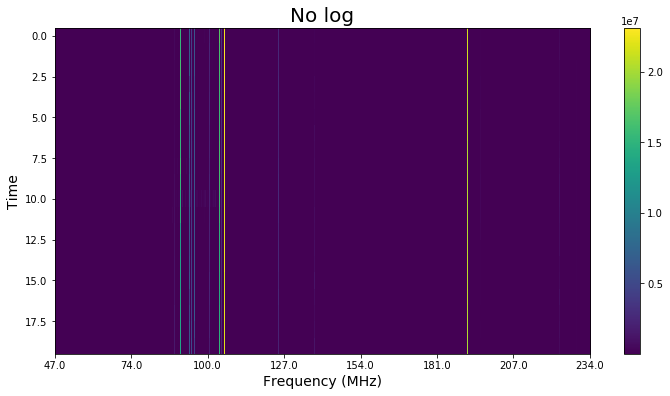

In [6]:
fig, axs = plt.subplots(1,1,figsize=(12,6))
im = plt.imshow(np.abs(data), aspect='auto')
cbar = fig.colorbar(im)
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time', fontsize = 14)
axs.set_xlabel('Frequency (MHz)', fontsize = 14)
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)
axs.set_title("No log", fontsize= 20);

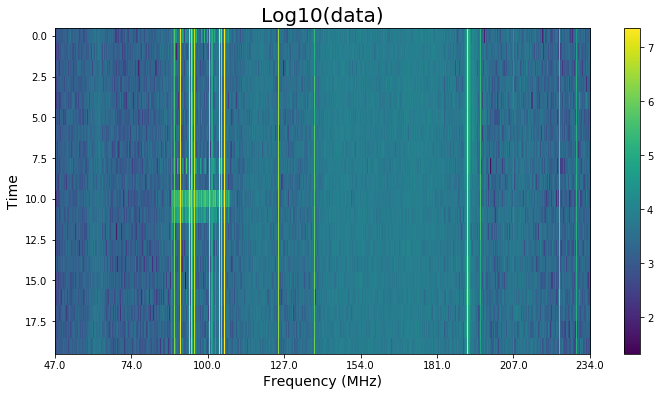

In [7]:
fig, axs = plt.subplots(1,1,figsize=(12,6))
im = plt.imshow(np.log10(np.abs(data)), aspect='auto')
cbar = fig.colorbar(im)
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time', fontsize = 14)
axs.set_xlabel('Frequency (MHz)', fontsize = 14)
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)
axs.set_title("Log10(data)", fontsize= 20);

From the two graphs above, there are defined features that cluster around 100MHz, one at 126-ish and 130ish, and one at around 190MHz. The colors at those frequencies are brighter than the rest (the rest is probably background). Interesting to note is that on the log10 plot, there is some "stretching" of color around the 100MHz, at time 0, a really bright stretch at time 10 and 11, and one at 8. I will examine those further later on. These two were cross-correlation plots, because we used two different antennae. 
## Auto-correlation
Let's look at the same kind of plots, but an autocorrelation, as this can be used to see if any of the antennae are broken:

In [8]:
antenna1 = 23
antenna2 = 23
data = uv.get_data(antenna1,antenna2)

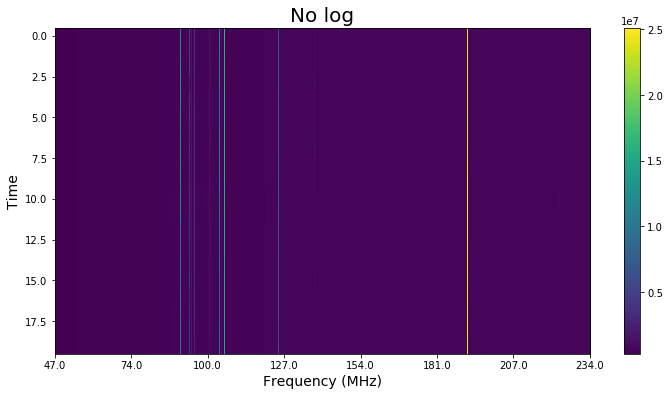

In [9]:
fig, axs = plt.subplots(1,1,figsize=(12,6))
im = plt.imshow(np.abs(data), aspect='auto', interpolation = 'nearest')
cbar = fig.colorbar(im)
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time', fontsize = 14)
axs.set_xlabel('Frequency (MHz)', fontsize = 14)
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)
axs.set_title("No log", fontsize= 20);

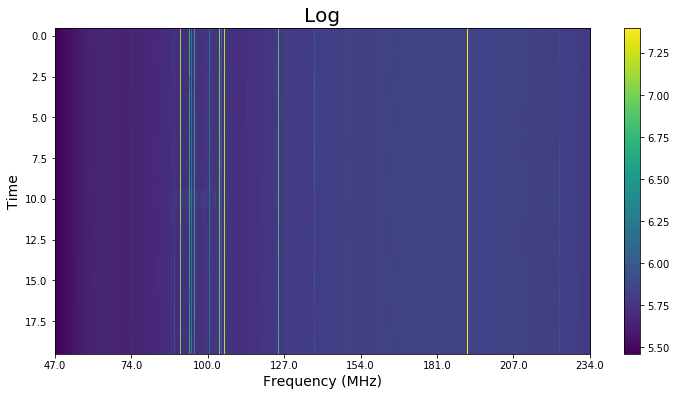

In [10]:
fig, axs = plt.subplots(1,1,figsize=(12,6))
im = plt.imshow(np.log10(np.abs(data)), aspect='auto',interpolation = 'nearest')
cbar = fig.colorbar(im)
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time', fontsize = 14)
axs.set_xlabel('Frequency (MHz)', fontsize = 14)
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)
axs.set_title("Log", fontsize= 20);

In [11]:
sa=[]
for i in range(len(pairs)):
    if pairs[i][0]==pairs[i][1]:
        sa.append(pairs[i])
len(sa)

fig,ax=plt.subplots(6,6,figsize=(20,20))
ax=ax.flatten()
for i in range(36):
    pr=sa[i]
    dat = uv.get_data(pr)
    ax[i].set_title(pr)
    ax[i].plot(freqs,np.log10(abs(dat[10])))

NameError: name 'pairs' is not defined

In these plots, the only thing that seems unique is just how bright that frequency at 190MHz is compared to the rest. These two plots also show us that time does not affect the signal for the most part- the lines seem to be of equal strength all the way down. The exception is the lines right below 100MHz, around time 4. There is a very faint color "stretch" around time 10 which we saw before. Going forward, I will look at that time carefully.

## Non-sky background, possibly a phenomenon?
Time to explore that weird "stretch", or blip, around time 10.

In [ ]:
fig,ax=plt.subplots(1,3,figsize=(16,5),sharey=True)
ax[0].set_yscale('log')
ax[0].plot(freqs,np.abs(data[9]))
ax[1].set_yscale('log')
ax[1].plot(freqs,np.abs(data[10]))
ax[2].set_yscale('log')
ax[2].plot(freqs,np.abs(data[11]))
ax[0].set_ylabel("Frequencies", fontsize=14)
ax[0].set_xlabel("What is this axis???", fontsize = 14)
ax[1].set_xlabel("What is this axis???", fontsize = 14)
ax[2].set_xlabel("What is this axis???", fontsize = 14)
ax[0].set_title("Time 9", fontsize = 20)
ax[1].set_title("Time 10", fontsize = 20)
ax[2].set_title("Time 11", fontsize = 20)
fig,ax=plt.subplots(1,figsize=(16,5),sharey=False)
ax.set_yscale('log')
ax.plot(freqs,np.abs(data[9]))
ax.set_yscale('log')
ax.plot(freqs,np.abs(data[10]))
ax.set_yscale('log')
ax.plot(freqs,np.abs(data[11]))
ax.set_ylabel("Frequencies", fontsize=14)
ax.set_xlabel("What is this axis???")
ax.set_title("Times 9,10,11 overplotted", fontsize = 20);

Here is a plot of pairs. I'm not sure what's going on here, to be honest. It looks like a Jackson Pollock painting. That's all I got.

In [ ]:
pairs = uv.get_antpairs()
pairs[0][1]
for i in range(666):
    ant1 = pairs[i][0]
    ant2 = pairs[i][1]
    dat = abs(uv.get_data(ant1, ant2))
    plt.yscale('log')
    plt.plot(freqs, dat[19])

What about a 2D histogram? We've used those in class before, I bet it would be useful. And it is. It gives us the general background of the baselines:

In [ ]:
for i in range(20):
    plt.hist2d(freqs,np.log(data[i]), bins = 100)
plt.colorbar()
plt.show()

## Notes/ further explanations:
Non-sky phenomenon: not background noise, it's contamination (someone on Earth is doing funny things with a radio)

Polution from radio (like cell towers?) could be the blip, or it could be a 21cm that's redshifted.